In [3]:
from Outils import *
from Metriques import *
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from random import *
from statistics import *
from sklearn.metrics import *

## Extraction des données

In [4]:
iris = datasets.load_iris()

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [5]:
#iris.target_names --- 0 = setosa, 1=versicolor, 2= viriginica
#iris.feature_names --- sepal length, width, petal length, i=width

In [6]:
Data = iris["data"]

In [7]:
Result = iris["target"]

## Application du k-means

In [8]:
np.array([[0,1],[2,6]]).mean(axis=0)

array([1. , 3.5])

In [8]:
def k_means(K,data,max_iter,function_initial_centers):
    """
    Renvoie un tuple contenant:
    - la liste des centres de chaque cluster
    - label contenant les clusters correspondants de chaque points
    chaque liste est associé à la valeur du numéro du cluster auquel il correspond 
    """
    centroid = []
    cluster_not_the_same = True
    c = 0
    IVC = []
    

    # Calcul du centre aléatoire    
    centroid = function_initial_centers(K,data)
  
    # Tant que la condition d'arrêt n'est pas respecté 
    while(c!=max_iter and cluster_not_the_same):
        # Remise à zéro de clusters
        cluster = dict((i,[]) for i in range(K))
        c += 1
        label = []
        
        #Assignation des points en fonction de leurs clusters
        for point in data:
            # Aucun cluster n'est assigné au point
            clust = (None,float('inf')) # (numéro du cluster,distance au cluster)
            #Choix du cluster
            for i in range(K):
                dist = np.linalg.norm(point-centroid[i])
                #Si le centre du cluster est plus proche que ceux étudiés avant nous le remplaçons
                if dist<clust[1]:
                    clust = (i,dist)
            
            cluster[clust[0]].append(point)
            label.append(clust[0])
        
        # Recalcule les centres
        new_centroid = [np.mean(cluster[i],axis=0) for i in range(K)]
        # Calcul de l'intra variance cluster pour itération
        IVC.append(IVC_Kmeans(centroid,cluster))
        
        # On regarde si les centres sont toujours les mêmes
        if (np.array_equal(new_centroid,centroid)): 
            cluster_not_the_same= False
        else:
            centroid=new_centroid
        
    
    return (centroid,cluster,label,[i for i in range(1,len(IVC)+1)],IVC)

In [10]:
mean_centroid(3,Data)

[array([5.006, 3.428, 1.462, 0.246]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([6.588, 2.974, 5.552, 2.026])]

## Résultats des données

In [18]:
acc_test = []
rd_test = []
rd = []
rd_adj = []
rd_adj_test = []
for exp in range(4):
    seed(exp)
    _,_,label,_,_ = k_means(3,Data,100,random_centers)
    acc_test.append(Accuracy(Result,label))
    rd_test.append(rand_index(Result,label))
    rd.append(rand_score(Result,label))
    rd_adj.append(adjusted_rand_score(Result,label))
    rd_adj_test.append(Adjusted_Rand_Index(Result,label))

### Rand index

In [19]:
mean(rd_test),pstdev(rd_test)

(0.8752348993288591, 0.0025961387943425882)

In [20]:
mean(rd),pstdev(rd)

(0.8752348993288591, 0.0025961387943425882)

### Adjusted Rand Index

In [21]:
mean(rd_adj),pstdev(rd_adj)

(0.7198161525837532, 0.006017213614157863)

In [22]:
mean(rd_adj_test),pstdev(rd_adj_test)

(0.7198161525837531, 0.006017213614157912)

### Accuracy

In [23]:
mean(acc_test),pstdev(acc_test)

(0.805, 0.1453253055886842)

### Intra variance cluster

In [24]:
_,_,_,X,Y = k_means(3,Data,100,mean_centroid)

Text(0, 0.5, 'IVC')

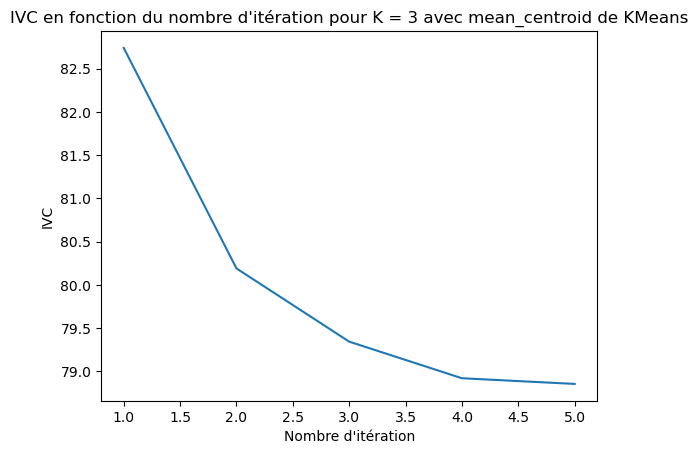

In [25]:
plt.plot(X,Y)
plt.title("IVC en fonction du nombre d'itération pour K = 3 avec mean_centroid de KMeans")
plt.xlabel("Nombre d'itération")
plt.ylabel("IVC")

In [26]:
seed(0)
_,_,_,X,Y = k_means(2,Data,100,random_centers)

In [27]:
X,Y

([1, 2, 3, 4, 5, 6],
 [1184.937259940181,
  296.10946185923586,
  204.01645864939388,
  157.6393962962963,
  152.51316676847566,
  152.34795176035792])

Text(0, 0.5, 'IVC')

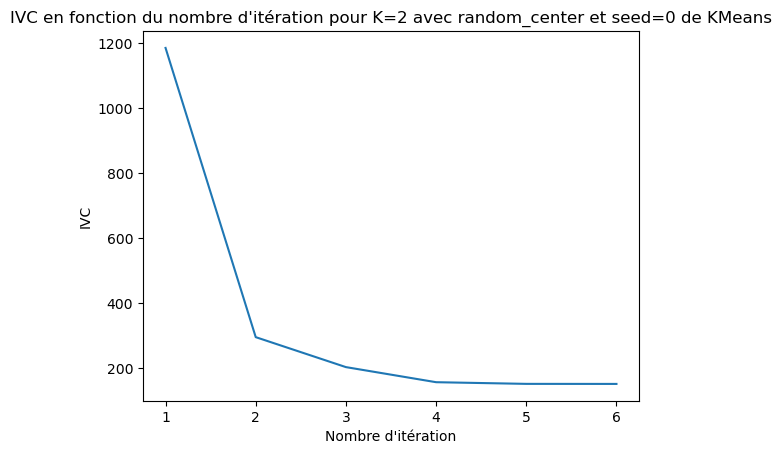

In [28]:
plt.plot(X,Y)
plt.title("IVC en fonction du nombre d'itération pour K=2 avec random_center et seed=0 de KMeans")
plt.xlabel("Nombre d'itération")
plt.ylabel("IVC")

Text(0, 0.5, 'IVC')

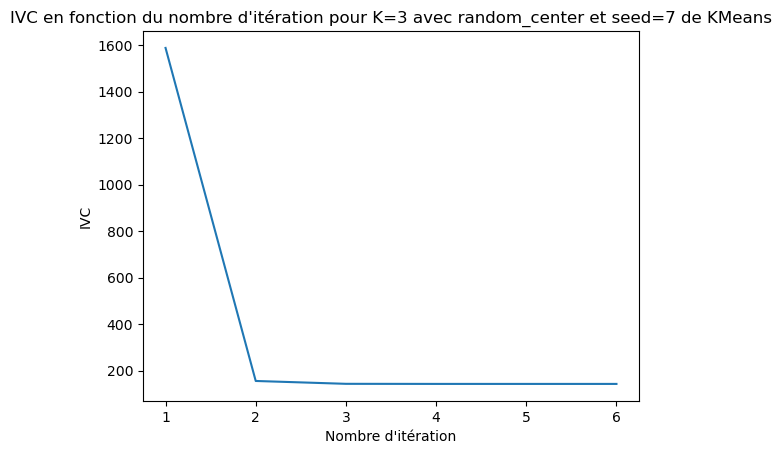

In [31]:
seed(0)
_,_,_,X,Y = k_means(3,Data,100,random_centers)
plt.plot(X,Y)
plt.title("IVC en fonction du nombre d'itération pour K=3 avec random_center et seed=7 de KMeans")
plt.xlabel("Nombre d'itération")
plt.ylabel("IVC")

In [32]:
Y,X

([1588.2151366056373,
  155.4507274262369,
  143.173421016758,
  142.8049513888889,
  142.77336161700458,
  142.7540625],
 [1, 2, 3, 4, 5, 6])

In [33]:
Y = []
for k in range(1,10):
    _,_,_,_,X = k_means(k,Data,15,mean_centroid)
    Y.append(X[-1])

Text(0, 0.5, 'IVC')

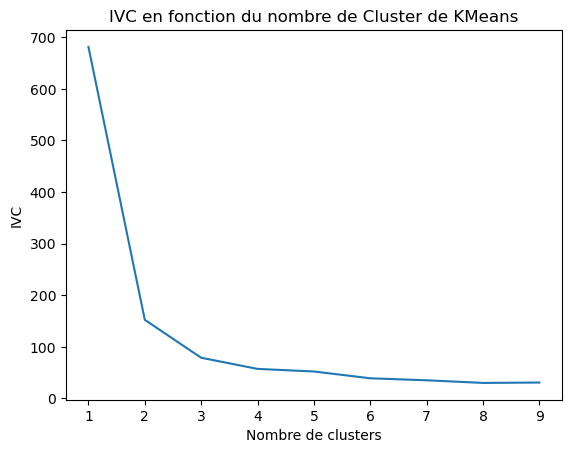

In [34]:
plt.plot([i for i in range(1,len(Y)+1)],Y)
plt.title("IVC en fonction du nombre de Cluster de KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel("IVC")

### Silhouette

In [38]:
cent,clust,lab,_,_ = k_means(3,Data,100,random_centers)
print("my silhouette : ", Sil_KMeans(clust,lambda x,y : np.linalg.norm(x-y)))
print("Silhouette librairie",silhouette_score(Data,lab))

my silhouette :  0.5522563793928343
Silhouette librairie 0.5511916046195919
